In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture

In [96]:
train = pd.read_excel('estaturas.xlsx', sheet_name='normales')
test = pd.read_excel('estaturas.xlsx', sheet_name='valtest(normales)')

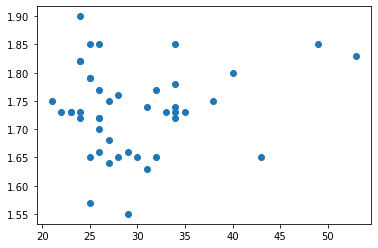

In [80]:
plt.scatter(y=train["Estatura(metros)"], x=train["Edad(años)"])

## K-Means

In [66]:
class k_means:
    def fit(self, train_data, k, max_iteraciones):
        self._centroides = np.zeros((k,2),dtype='float')
        self._classes = np.zeros((len(train_data),1), dtype='int')
        self._distancias = np.zeros((len(train_data),k), dtype='float')
        ## inicializacion centroides
        for i in range(k):
            self._centroides[i][0] = np.random.uniform(train_data.min(axis=0)[0], train_data.max(axis=0)[0])
            self._centroides[i][1] = np.random.uniform(train_data.min(axis=0)[1], train_data.max(axis=0)[1])
        for _ in range(max_iteraciones):
            ## distancias euclideanas
            for i in range(k):
                self._distancias[:,i] = np.linalg.norm(train_data - self._centroides[i,:],axis=1)
            ## asignacion de clases
            self._classes = np.argmin(self._distancias, axis=1)
            ## actualizar centroides si estos no cambian en la siguiente iteracion
            tempCentroides = np.zeros((k,2),dtype='float')
            for i in range(k):
                tempCentroides[i] = train_data[self._classes==i].mean()
            if ~(self._centroides == tempCentroides).all():
                self._centroides = tempCentroides
            else:
                break
        train_graph = train_data.copy()
        train_graph['cluster'] = self._classes
        plt.scatter(y=train_graph["Estatura(metros)"], x=train_graph["Edad(años)"], c=train_graph["cluster"])
        plt.scatter(y=self._centroides[:,0], x=self._centroides[:,1], c='red', marker='+', linewidth=2)

    def predict(self, test_data):
        distancias = np.zeros((len(test_data),self._centroides.shape[0]), dtype='float')
        for i in range(self._centroides.shape[0]):
                distancias[:,i] = np.linalg.norm(test_data - self._centroides[i,:],axis=1)
        return np.argmin(distancias, axis=1)


### Entrenamiento con valores de K = \[2,3,4,5,6\]

array([[ 1.776     , 44.6       ],
       [ 1.72846154, 27.66666667]])

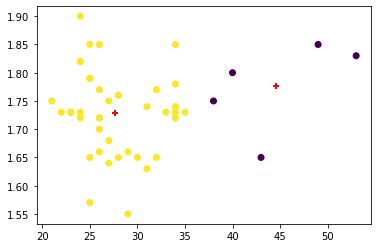

In [81]:
k_means_model2 = k_means()
k_means_model2.fit(train,2,10)
k_means_model2._centroides

array([[ 1.7825    , 46.25      ],
       [ 1.72925926, 25.37037037],
       [ 1.72846154, 33.23076923]])

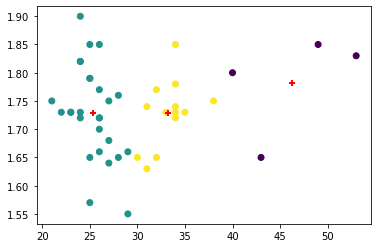

In [82]:
k_means_model3 = k_means()
k_means_model3.fit(train,3,10)
k_means_model3._centroides

array([[ 1.72666667, 32.83333333],
       [ 1.72925926, 25.37037037],
       [ 1.73333333, 40.33333333],
       [ 1.84      , 51.        ]])

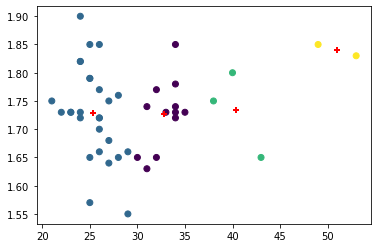

In [83]:
k_means_model4 = k_means()
k_means_model4.fit(train,4,10)
k_means_model4._centroides

array([[ 1.70076923, 27.        ],
       [ 1.73333333, 40.33333333],
       [ 1.72666667, 32.83333333],
       [ 1.84      , 51.        ],
       [ 1.75571429, 23.85714286]])

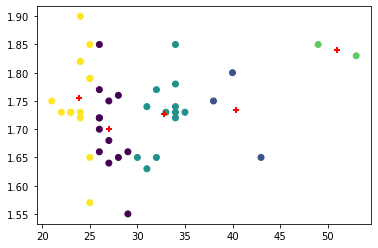

In [85]:
k_means_model5 = k_means()
k_means_model5.fit(train,5,10)
k_means_model5._centroides

array([[ 1.84      , 51.        ],
       [ 1.66285714, 29.42857143],
       [ 1.775     , 39.        ],
       [ 1.74217391, 24.82608696],
       [ 1.74444444, 33.55555556],
       [ 1.65      , 43.        ]])

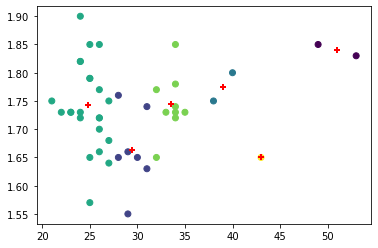

In [86]:
k_means_model6 = k_means()
k_means_model6.fit(train,6,10)
k_means_model6._centroides

## GMM
### Entrenamiento con valores de K = \[2,3,4,5,6\]

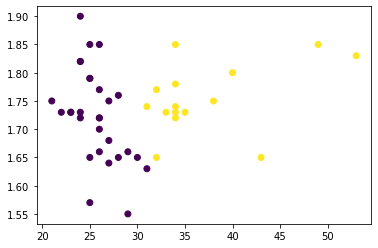

In [87]:
gm2 = GaussianMixture(n_components=2, random_state=0).fit(train)
train_graph_gm = train.copy()
train_graph_gm['cluster'] = gm2.predict(train)
plt.scatter(y=train_graph_gm["Estatura(metros)"], x=train_graph_gm["Edad(años)"], c=train_graph_gm["cluster"])

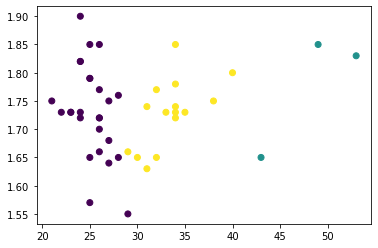

In [88]:
gm3 = GaussianMixture(n_components=3, random_state=0).fit(train)
train_graph_gm = train.copy()
train_graph_gm['cluster'] = gm3.predict(train)
plt.scatter(y=train_graph_gm["Estatura(metros)"], x=train_graph_gm["Edad(años)"], c=train_graph_gm["cluster"])

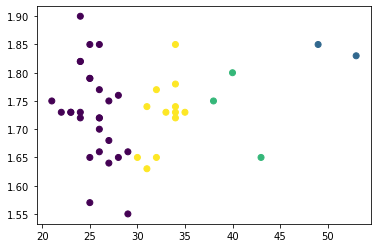

In [89]:
gm4 = GaussianMixture(n_components=4, random_state=0).fit(train)
train_graph_gm = train.copy()
train_graph_gm['cluster'] = gm4.predict(train)
plt.scatter(y=train_graph_gm["Estatura(metros)"], x=train_graph_gm["Edad(años)"], c=train_graph_gm["cluster"])

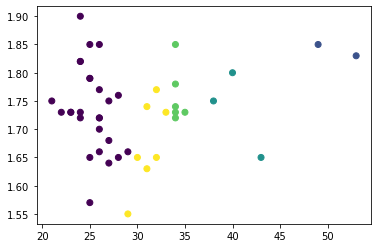

In [90]:
gm5 = GaussianMixture(n_components=5, random_state=0).fit(train)
train_graph_gm = train.copy()
train_graph_gm['cluster'] = gm5.predict(train)
plt.scatter(y=train_graph_gm["Estatura(metros)"], x=train_graph_gm["Edad(años)"], c=train_graph_gm["cluster"])

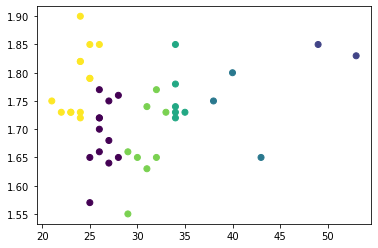

In [91]:
gm6 = GaussianMixture(n_components=6, random_state=0).fit(train)
train_graph_gm = train.copy()
train_graph_gm['cluster'] = gm6.predict(train)
plt.scatter(y=train_graph_gm["Estatura(metros)"], x=train_graph_gm["Edad(años)"], c=train_graph_gm["cluster"])

## Metodo del Codo
Considerando la cantidad de observaciones, la cantidad de clusters a identificar (sin provocar overfitting) es muy bajo por lo que seria innecesario calcular el numero optimo de K ya que probablemente el valor optimo sea 2 o 3

## Prediccion datos de validacion (Utilizando 3 clusters)

In [127]:
test_data = test.copy()
test_data['cluster_kmeans'] = k_means_model3.predict(test)
test_data['cluster_gmm'] = gm3.predict(test)
prob_gmm = pd.DataFrame(gm3.predict_proba(test).round(5),columns=['Prob_0','Prob_1','Prob_2'])
pd.concat([test_data,prob_gmm], axis=1)


,Estatura(metros),Edad(años),cluster_kmeans,cluster_gmm,Prob_0,Prob_1,Prob_2
0,1.82,25,1,0,1.00000,0.00000,0.00000
1,1.80,27,1,0,0.99887,0.00000,0.00113
2,1.60,31,2,2,0.22289,0.00000,0.77711
3,1.60,35,2,2,0.00151,0.02336,0.97513
4,1.82,30,2,2,0.45530,0.00000,0.54470
5,1.76,32,2,2,0.00185,0.00000,0.99815
6,1.79,31,2,2,0.02801,0.00000,0.97199
7,1.61,31,2,2,0.16837,0.00000,0.83163


## Estimacion Valor Esperado Estatura/Edad

In [148]:
muestra, clusters = gm3.sample(1000)
def f(x):
    return x[:,0]/x[:,1]    # Estatura / Edad
valor_esperado_f = np.mean(f(muestra))
valor_esperado_f

0.06104490186340452